<a href="https://colab.research.google.com/github/michaufsc/Dengue_bioatividade/blob/main/QSARbioactivity_prediction_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QSAR Model Building of betalactamoose Inhibitors

Data Professor YouTube channel, http://youtube.com/dataprofessor

Read in data

In [ ]:
import pandas as pd

In [ ]:
dataset_url = '/content/drive/MyDrive/Alfavaca/dengueprot_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.468521
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.443697
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.795880
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.769551
58,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.823909
59,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.638272
60,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.387216


In [ ]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
58,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
59,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
60,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = dataset.iloc[:,-1]
Y

0     6.468521
1     6.443697
2     5.301030
3     5.795880
4     5.698970
        ...   
57    5.769551
58    5.823909
59    5.638272
60    7.387216
61    6.309804
Name: pIC50, Length: 62, dtype: float64

Remove low variance features

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP15,PubchemFP16,PubchemFP21,PubchemFP23,PubchemFP24,PubchemFP30,PubchemFP31,PubchemFP33,...,PubchemFP779,PubchemFP784,PubchemFP788,PubchemFP798,PubchemFP800,PubchemFP807,PubchemFP809,PubchemFP821,PubchemFP828,PubchemFP833
0,1,0,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
58,1,1,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
59,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
60,1,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.to_csv('/content/descriptor_list.csv', index = False)

# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

Random Forest Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.926544224956437

Model prediction

In [ ]:
Y_pred = model.predict(X)
Y_pred

array([6.15065359, 6.33628823, 5.24541198, 5.74996065, 5.38666201,
       5.0144171 , 5.17269155, 4.88627277, 5.28214255, 5.91963623,
       5.35411465, 6.67062031, 4.59952507, 5.31653737, 5.34728365,
       5.31723513, 5.04853592, 4.84442277, 4.93649345, 6.42570646,
       5.35403974, 5.85355198, 5.37037368, 5.11673968, 4.92709455,
       4.70257798, 4.55192604, 4.59906165, 5.43165537, 4.83449491,
       4.84624452, 4.90822389, 5.03912996, 5.11763823, 5.44450744,
       3.83695121, 3.48290478, 3.46884291, 3.79491731, 3.48970526,
       4.22407075, 3.82776601, 3.54159623, 3.48937213, 3.50857264,
       3.73625132, 3.51790725, 3.72069619, 4.30609343, 3.73998022,
       3.62080984, 4.27022441, 3.9196616 , 3.53720133, 4.60084575,
       4.66341071, 5.57857293, 5.63756142, 5.57756315, 5.4645315 ,
       6.84979735, 6.40188176])

In [ ]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.08
Coefficient of determination (R^2): 0.93


Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

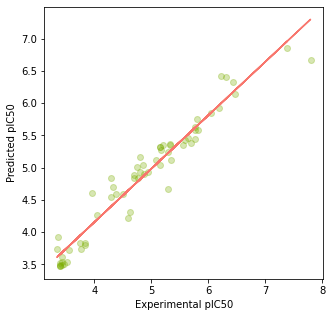

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

Save Model as Pickle Object

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('dengueprotein_model.pkl', 'wb'))